### <span style = 'color:green'>problem statement : detect credit card fraud transactions using Logistic Regression</span>

.


- Logistic Regression is a Machine Learning algorithm used to make predictions to find the value of a dependent variable such as the condition of a tumor (malignant or benign), classification of email (spam or not spam), or admission into a university (admitted or not admitted) by learning from independent variables (various features relevant to the problem).

**Difference between Logistic and Linear Regression**
The major difference between Logistic and Linear Regression is that Linear Regression is used to solve regression problems whereas Logistic Regression is used for classification problems.

**About the dataset**
- The dataset contains transactions made by credit cards in September 2013 by European cardholders.This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions



**Expected output**
- **Use histogram to represent to all the data**
- **Use Classification Report for scores**
- **Plot confusion matrix**


In [2]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Loading the dataset
df = pd.read_csv("C:\\Users\\manoj\\OneDrive\\Desktop\\Data Science Files\\Logistic Regression Assignment\\Logistic Regression Assignment\\creditcard.csv",encoding='utf-8')

In [4]:
# Exploring the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Checking for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

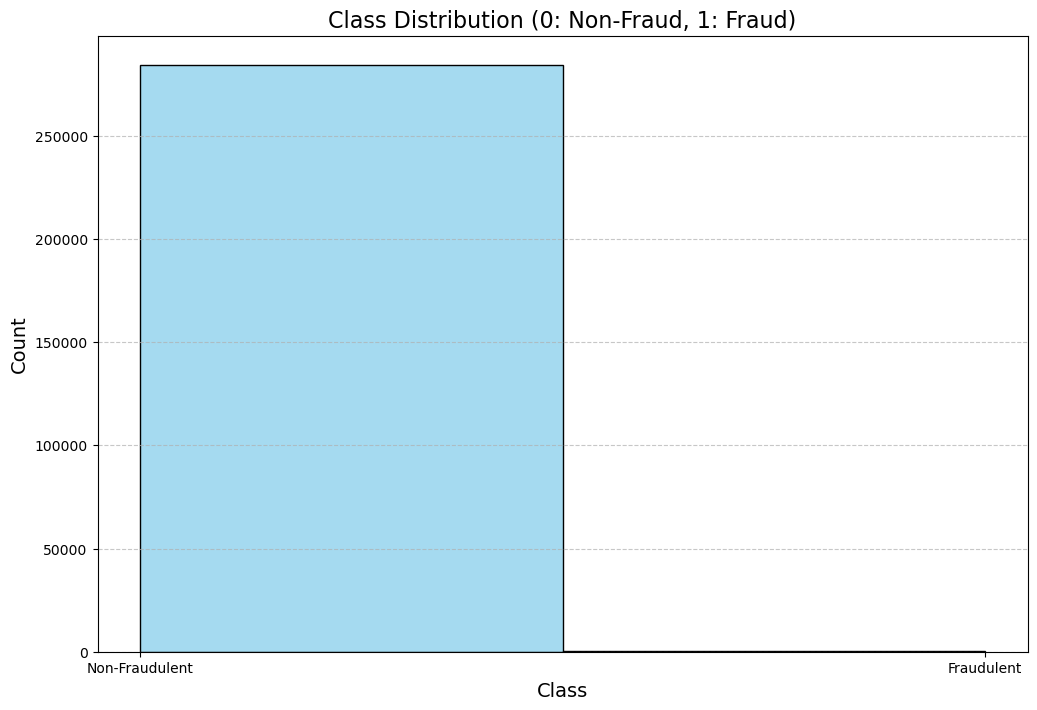

In [18]:
# Seting up the figure and axes
plt.figure(figsize=(12, 8))

# Plotting the histogram
sns.histplot(data=df, x='Class', bins=2, kde=False, color='skyblue', edgecolor='black')

# Customizing the plot
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [20]:
# Preparing the data
X = df.drop('Class', axis=1)
y = df['Class']


In [21]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
# Training the Logistic Regression model with class weights
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [24]:
# Making predictions
y_pred = model.predict(X_test)

In [25]:
# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



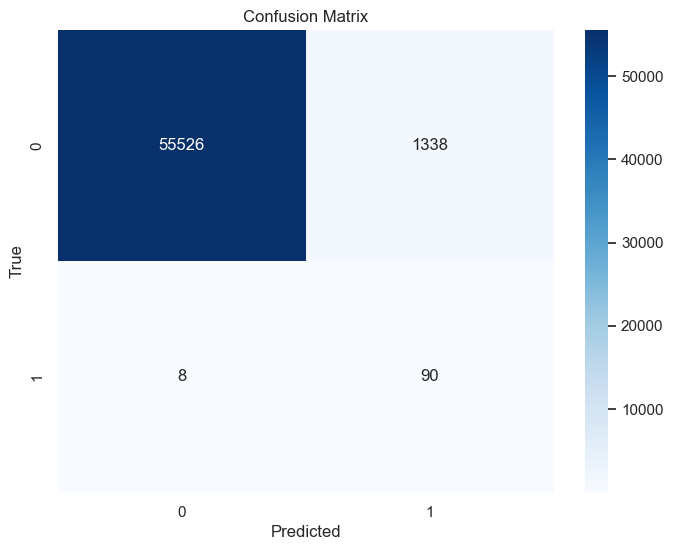

In [26]:
# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
#exlenation of above confusion matrix
#True Negatives (TN): 55526

#The number of non-fraudulent transactions correctly predicted as non-fraudulent.
#False Positives (FP): 1338

#The number of non-fraudulent transactions incorrectly predicted as fraudulent.
#False Negatives (FN): 8

#The number of fraudulent transactions incorrectly predicted as non-fraudulent.
#True Positives (TP): 90

#The number of fraudulent transactions correctly predicted as fraudulent.